In [1]:
import sys

sys.path.append("../")
sys.path.append("../cascade")
sys.path.append("../data_analysis")

# print(sys.path)

from cascade.cascade_driver import CascadeDriver, CascadeEvent
from cascade.particle_event import CascadeParticle

init_particle = CascadeParticle(2212, 1e9, 0)
cas_event = CascadeEvent(emin_threshold = 1e3, particle = init_particle)


112.02363286951959
112.02363286951959
1e+100
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
41622670.657007985
 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modi

In [2]:
cas_event.set_decay_on(True)
shower = CascadeDriver(cas_event)
shower.run(init_particle)

In [7]:
# import importlib
# import cascade.particle_event
# importlib.reload(cascade.particle_event)
# from cascade.particle_event import CascadeParticle


pt = shower.get_particles()



for p in pt:
    if p.generation_number > 20:
        print(p.get_parents())
        break

    

In [24]:
from data_analysis import CascadeAnalysis
import importlib
import data_analysis
importlib.reload(data_analysis)

ca = CascadeAnalysis(shower)

ca.print_stats()

Number of final particles = 3164822
Number of events = 106918:
 interactions = 96570, decays = 9365


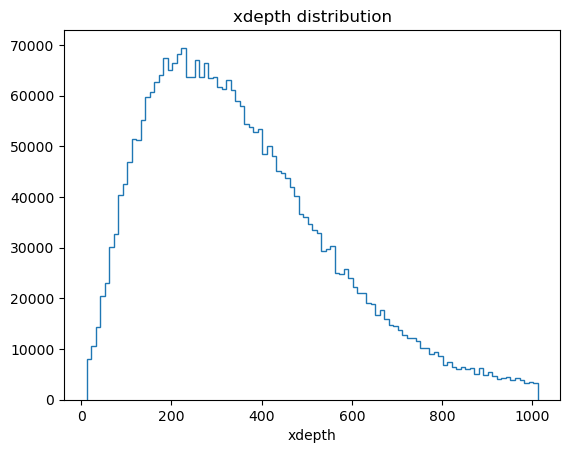

In [12]:
ca.plot_xdepth()

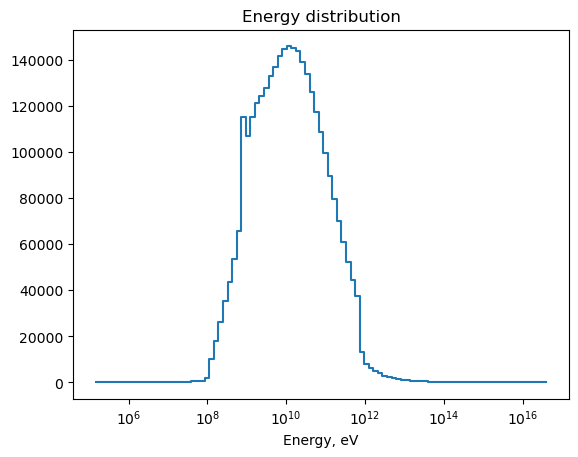

In [25]:
ca.plot_energy()

Min = 70.36, Max = 1011.20


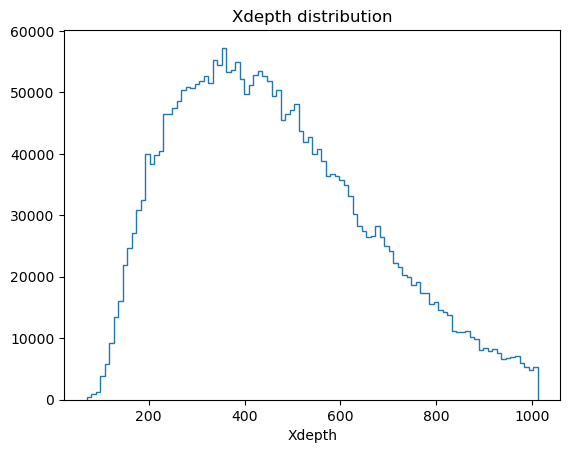

In [4]:
import importlib
import data_analysis
importlib.reload(data_analysis)

ca.plot_xdepth()

Min = 0.01 km, Max = 112.72 km


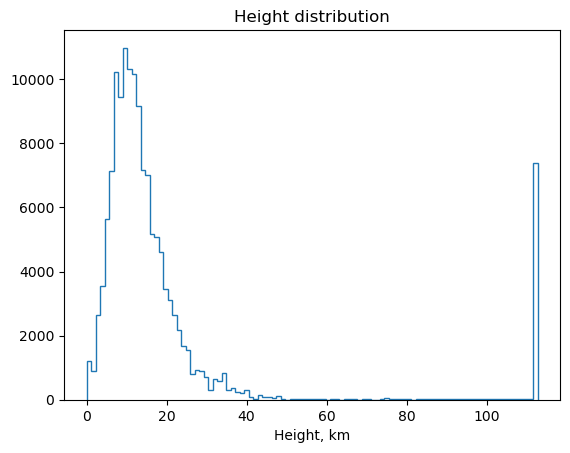

In [5]:
import importlib
import data_analysis
importlib.reload(data_analysis)

from data_analysis import plot_height_distribution
from data_analysis import plot_xdepth_distribution
# plot_xdepth_distribution(shower)
plot_height_distribution(shower)

In [11]:
final_prt = shower.get_particles()
print(f"Iterations = {shower.get_iterations()}, particles = {len(final_prt)}")

Iterations = 4379, particles = 91248


In [12]:
en_data = []

for i in range(len(final_prt)):
    en_data.append(final_prt[i].energy)
    
etot = 0
for ee in en_data:
    etot += ee
    
print(f"Energy conservation = {abs(etot - 1e9)/1e9}")

Energy conservation = 2.940360198378563e-06


Min = 8.44e+06 eV, Max = 5.39e+16 eV


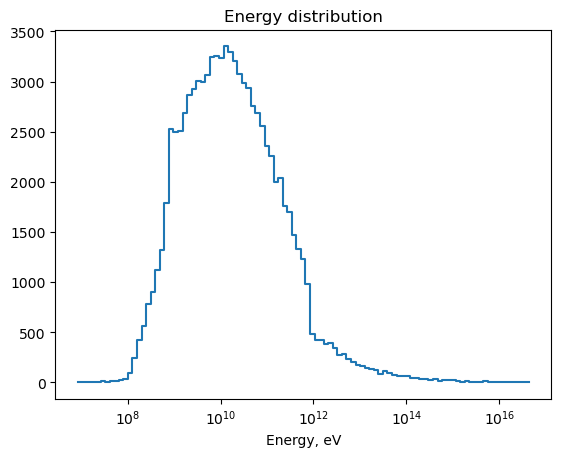

In [14]:
import matplotlib.pyplot as plt
import numpy as np


gr, cnt = np.histogram(np.log10(en_data), 100)
plt.semilogx()
plt.step(10**cnt[:-1]*1e9, gr)
plt.title("Energy distribution")
plt.xlabel("Energy, eV")
# plt.loglog(basex = 10)
# plt.stairs(gr,cnt)
# print(10**cnt)
np.min(en_data)*1e9/1e6
print(f"Min = {np.min(en_data)*1e9:0.2e} eV, Max = {np.max(en_data)*1e9:0.2e} eV")  

{111: 24252, 211: 19256, -211: 18876, 22: 5685, 2212: 2822, 2112: 2410, 321: 1883, 130: 1849, 310: 1830, -321: 1737, 14: 1614, -14: 1612, 11: 1110, -12: 1066, -11: 1000, 12: 956, -2212: 899, -2112: 889, 3122: 366, 3222: 200, -3122: 199, 3212: 184, 3112: 128, -3212: 124, -3222: 116, -3112: 94, -3322: 24, 3312: 24, -3312: 23, 3322: 18, -13: 2}


Text(0.5, 1.0, 'Particle type distribution')

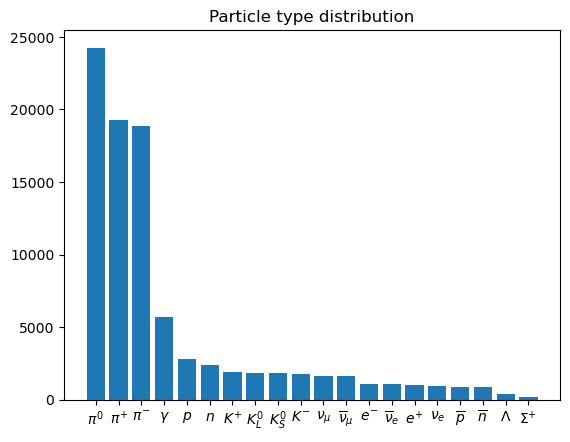

In [15]:
import particle
pid_dist = dict()

for prt in final_prt:
    pid_dist[prt.pid] = pid_dist.get(prt.pid, 0) + 1
    
pid_dist = dict(sorted(pid_dist.items(), key=lambda item: item[1], reverse=True))    
print(pid_dist)  

all_pdgs = {int(p.pdgid) : f"${p.latex_name}$" for p in particle.Particle.findall()}

ptypes = [all_pdgs[i] for i in pid_dist.keys()]
pnum = list(pid_dist.values())
plt.bar(ptypes[:20], pnum[:20])
plt.title("Particle type distribution")